### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

### Read CSV file and make a Pandas Dataframe


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Data.csv to Data.csv


In [3]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Data.csv']))
# Dataset is now stored in a Pandas Dataframe

In [4]:
data.shape

(180519, 5)

### CATEGORY SELECTION

In [5]:
filter = data['Category Name'].isin(['Cleats'])
#display the filter
filter1 = data[filter]

In [6]:
filter1.head()

,Category Name,order date (DateOrders),Order Item Discount,Order Item Quantity,Sales
48,Cleats,2/24/2016 13:57,4.8,2,119.980003
57,Cleats,4/13/2016 10:12,2.4,2,119.980003
58,Cleats,5/22/2016 14:10,24.0,2,119.980003
66,Cleats,9/22/2015 7:41,3.6,3,179.970001
67,Cleats,7/2/2017 9:03,12.6,3,179.970001


### Feature Extraction for working upon on Dataframe

In [7]:
filter1 = data.loc[filter, ['order date (DateOrders)','Sales','Order Item Discount','Order Item Quantity']]

In [8]:
filter1.head()


,order date (DateOrders),Sales,Order Item Discount,Order Item Quantity
48,2/24/2016 13:57,119.980003,4.8,2
57,4/13/2016 10:12,119.980003,2.4,2
58,5/22/2016 14:10,119.980003,24.0,2
66,9/22/2015 7:41,179.970001,3.6,3
67,7/2/2017 9:03,179.970001,12.6,3


In [9]:
filter1.shape

(24551, 4)

### Applying to Pandas DateTime format for easy access

In [10]:
filter1['order date (DateOrders)'] = pd.to_datetime(filter1['order date (DateOrders)'])


In [11]:
filter1.head()

,order date (DateOrders),Sales,Order Item Discount,Order Item Quantity
48,2016-02-24 13:57:00,119.980003,4.8,2
57,2016-04-13 10:12:00,119.980003,2.4,2
58,2016-05-22 14:10:00,119.980003,24.0,2
66,2015-09-22 07:41:00,179.970001,3.6,3
67,2017-07-02 09:03:00,179.970001,12.6,3


### Sorting the records by date and their time

In [12]:
filter1 = filter1.sort_values(by='order date (DateOrders)')
filter1.head(10)

,order date (DateOrders),Sales,Order Item Discount,Order Item Quantity
96131,2015-01-01 01:03:00,299.950012,3.000000,5
58046,2015-01-01 01:24:00,299.950012,0.000000,5
140014,2015-01-01 02:27:00,299.950012,74.989998,5
139424,2015-01-01 02:27:00,179.970001,30.590000,3
90810,2015-01-01 03:30:00,59.990002,12.000000,1
128849,2015-01-01 04:54:00,179.970001,28.799999,3
154363,2015-01-01 05:15:00,119.980003,8.400000,2
155729,2015-01-01 05:15:00,299.950012,59.990002,5
14665,2015-01-01 05:36:00,239.960007,35.990002,4
23828,2015-01-01 05:57:00,119.980003,6.600000,2


### Making column of Order date to Index

In [13]:
filter1.set_axis(filter1['order date (DateOrders)'], inplace=True)
filter1.drop(columns=['order date (DateOrders)'],inplace=True)

In [14]:
filter1.head()

,Sales,Order Item Discount,Order Item Quantity
order date (DateOrders),,,
2015-01-01 01:03:00,299.950012,3.000000,5
2015-01-01 01:24:00,299.950012,0.000000,5
2015-01-01 02:27:00,299.950012,74.989998,5
2015-01-01 02:27:00,179.970001,30.590000,3
2015-01-01 03:30:00,59.990002,12.000000,1


In [15]:
filter1.shape

(24551, 3)

### Day-wise Aggregates

In [16]:
Item_quantity = filter1.groupby([(filter1.index.year), (filter1.index.month), (filter1.index.day)])['Order Item Quantity'].sum().astype(int)
Item_discount = filter1.groupby([(filter1.index.year), (filter1.index.month), (filter1.index.day)])['Order Item Discount'].sum().astype(int)
Item_sales = filter1.groupby([(filter1.index.year), (filter1.index.month), (filter1.index.day)])['Sales'].sum().astype(int)

### Display in single Dataframe

In [17]:
ItemSales=pd.DataFrame(Item_sales)
ItemDiscount=pd.DataFrame(Item_discount)
ItemQuantity=pd.DataFrame(Item_quantity)

In [18]:
total=ItemSales.join(ItemDiscount)


In [19]:

daily_Sales=total.join(ItemQuantity)

In [20]:
daily_Sales.head(5)

Sales  \
order date (DateOrders) order date (DateOrders) order date (DateOrders)          
2015                    1                       1                         4079   
                                                2                         4619   
                                                3                         4379   
                                                4                         5279   
                                                5                         5399   

                                                                         Order Item Discount  \
order date (DateOrders) order date (DateOrders) order date (DateOrders)                        
2015                    1                       1                                        496   
                                                2                                        559   
                                                3                                        212   
                                                4                                        519   
                                                5                                        661   

                                                                         Order Item Quantity  
order date (DateOrders) order date (DateOrders) order date (DateOrders)                       
2015                    1                       1                                         68  
                                                2                                         77  
                                                3                                         73  
                                                4                                         88  
                                                5                                         90

### Converting index to a single column only

In [21]:
y = daily_Sales.index.get_level_values(0)
m = daily_Sales.index.get_level_values(1)
d = daily_Sales.index.get_level_values(2)

In [22]:
daily_Sales['Date'] = pd.to_datetime(y* 10000 + m * 100 + d * 1, format="%Y%m%d")

In [23]:
daily_Sales.set_index('Date', append=True, inplace=True)

In [24]:
daily_Sales=daily_Sales.droplevel(0)
daily_Sales=daily_Sales.droplevel(0)
daily_Sales=daily_Sales.droplevel(0)

In [25]:
daily_Sales.head(5)

,Sales,Order Item Discount,Order Item Quantity
Date,,,
2015-01-01,4079,496,68
2015-01-02,4619,559,77
2015-01-03,4379,212,73
2015-01-04,5279,519,88
2015-01-05,5399,661,90


In [26]:
daily_Sales.head(10)

,Sales,Order Item Discount,Order Item Quantity
Date,,,
2015-01-01,4079,496,68
2015-01-02,4619,559,77
2015-01-03,4379,212,73
2015-01-04,5279,519,88
2015-01-05,5399,661,90
2015-01-06,3719,374,62
2015-01-07,4259,328,71
2015-01-08,4979,631,83
2015-01-09,4739,467,79


In [27]:
daily_Sales.shape

(1006, 3)

### Checking the sum of Column 'Order Item Quantity'

In [28]:
Total = daily_Sales['Order Item Quantity'].sum()
print(Total)


73734


In [29]:
Cleats_Sold = daily_Sales[["Order Item Quantity"]]
Cleats_Sold.tail()

,Order Item Quantity
Date,
2017-09-28,42
2017-09-29,40
2017-09-30,90
2017-10-01,86
2017-10-02,34


In [30]:
Cleats_Sold.shape

(1006, 1)

# DATA PREPARATION

### FEATURE ENGINEERING

Considering the prior 90 days sales to predict the number of items sold for the month of April_2015 till Sept_2017 

In [31]:
April_2015 = Cleats_Sold.iloc[1:90]
May_2015 = Cleats_Sold.iloc[31:120]
June_2015 = Cleats_Sold.iloc[62:151]
July_2015 = Cleats_Sold.iloc[92:181]
August_2015 = Cleats_Sold.iloc[123:212]
Sept_2015 = Cleats_Sold.iloc[154:243]
Oct_2015 = Cleats_Sold.iloc[184:273]
Nov_2015 = Cleats_Sold.iloc[215:304]
Dec_2015 = Cleats_Sold.iloc[245:334]
Jan_2016 = Cleats_Sold.iloc[276:365]
Feb_2016 = Cleats_Sold.iloc[307:396]
March_2016 = Cleats_Sold.iloc[336:425]
April_2016 = Cleats_Sold.iloc[367:456]
May_2016 = Cleats_Sold.iloc[397:486]
June_2016 = Cleats_Sold.iloc[428:517]
July_2016 = Cleats_Sold.iloc[458:547]
August_2016 = Cleats_Sold.iloc[489:578]
Sept_2016 = Cleats_Sold.iloc[520:609]
Oct_2016 = Cleats_Sold.iloc[550:639]
Nov_2016 = Cleats_Sold.iloc[581:670]
Dec_2016 = Cleats_Sold.iloc[611:700]
Jan_2017 = Cleats_Sold.iloc[642:731]
Feb_2017 = Cleats_Sold.iloc[673:762]
March_2017 = Cleats_Sold.iloc[701:790]
April_2017 = Cleats_Sold.iloc[732:821]
May_2017 = Cleats_Sold.iloc[762:851]
June_2017 = Cleats_Sold.iloc[793:882]
July_2017 = Cleats_Sold.iloc[823:912]
August_2017 = Cleats_Sold.iloc[854:943]
Sept_2017 = Cleats_Sold.iloc[885:974]

In [32]:
April_2015.tail()

,Order Item Quantity
Date,
2015-03-27,55
2015-03-28,66
2015-03-29,61
2015-03-30,131
2015-03-31,76


In [33]:
April_2015.shape

(89, 1)

### Taking Transpose to convert 90 days sales as Single row/record for each month to be predicted

In [34]:
Row_1 = pd.DataFrame(April_2015.to_numpy().T).add_prefix('Day')
Row_2 = pd.DataFrame(May_2015.to_numpy().T).add_prefix('Day')
Row_3 = pd.DataFrame(June_2015.to_numpy().T).add_prefix('Day')
Row_4 = pd.DataFrame(July_2015.to_numpy().T).add_prefix('Day')
Row_5 = pd.DataFrame(August_2015.to_numpy().T).add_prefix('Day')
Row_6 = pd.DataFrame(Sept_2015.to_numpy().T).add_prefix('Day')
Row_7 = pd.DataFrame(Oct_2015.to_numpy().T).add_prefix('Day')
Row_8 = pd.DataFrame(Nov_2015.to_numpy().T).add_prefix('Day')
Row_9 = pd.DataFrame(Dec_2015.to_numpy().T).add_prefix('Day')
Row_10 = pd.DataFrame(Jan_2016.to_numpy().T).add_prefix('Day')
Row_11 = pd.DataFrame(Feb_2016.to_numpy().T).add_prefix('Day')
Row_12 = pd.DataFrame(March_2016.to_numpy().T).add_prefix('Day')
Row_13 = pd.DataFrame(April_2016.to_numpy().T).add_prefix('Day')
Row_14 = pd.DataFrame(May_2016.to_numpy().T).add_prefix('Day')
Row_15 = pd.DataFrame(June_2016.to_numpy().T).add_prefix('Day')
Row_16 = pd.DataFrame(July_2016.to_numpy().T).add_prefix('Day')
Row_17 = pd.DataFrame(August_2016.to_numpy().T).add_prefix('Day')
Row_18 = pd.DataFrame(Sept_2016.to_numpy().T).add_prefix('Day')
Row_19 = pd.DataFrame(Oct_2016.to_numpy().T).add_prefix('Day')
Row_20 = pd.DataFrame(Nov_2016.to_numpy().T).add_prefix('Day')
Row_21 = pd.DataFrame(Dec_2016.to_numpy().T).add_prefix('Day')
Row_22 = pd.DataFrame(Jan_2017.to_numpy().T).add_prefix('Day')
Row_23 = pd.DataFrame(Feb_2017.to_numpy().T).add_prefix('Day')
Row_24 = pd.DataFrame(March_2017.to_numpy().T).add_prefix('Day')
Row_25 = pd.DataFrame(April_2017.to_numpy().T).add_prefix('Day')
Row_26 = pd.DataFrame(May_2017.to_numpy().T).add_prefix('Day')
Row_27 = pd.DataFrame(June_2017.to_numpy().T).add_prefix('Day')
Row_28 = pd.DataFrame(July_2017.to_numpy().T).add_prefix('Day')
Row_29 = pd.DataFrame(August_2017.to_numpy().T).add_prefix('Day')
Row_30 = pd.DataFrame(Sept_2017.to_numpy().T).add_prefix('Day')

In [35]:
Row_1

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day79,Day80,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88
0,77,73,88,90,62,71,83,79,81,63,...,84,79,73,82,45,55,66,61,131,76


### Merging all Rows to prepare the DataFrame

In [36]:
merge2=Row_1.append(Row_2,ignore_index=True)
merge3=merge2.append(Row_3,ignore_index=True)
merge4=merge3.append(Row_4,ignore_index=True)
merge5=merge4.append(Row_5,ignore_index=True)
merge6=merge5.append(Row_6,ignore_index=True)
merge7=merge6.append(Row_7,ignore_index=True)
merge8=merge7.append(Row_8,ignore_index=True)
merge9=merge8.append(Row_9,ignore_index=True)
merge10=merge9.append(Row_10,ignore_index=True)
merge11=merge10.append(Row_11,ignore_index=True)
merge12=merge11.append(Row_12,ignore_index=True)
merge13=merge12.append(Row_13,ignore_index=True)
merge14=merge13.append(Row_14,ignore_index=True)
merge15=merge14.append(Row_15,ignore_index=True)
merge16=merge15.append(Row_16,ignore_index=True)
merge17=merge16.append(Row_17,ignore_index=True)
merge18=merge17.append(Row_18,ignore_index=True)
merge19=merge18.append(Row_19,ignore_index=True)
merge20=merge19.append(Row_20,ignore_index=True)
merge21=merge20.append(Row_21,ignore_index=True)
merge22=merge21.append(Row_22,ignore_index=True)
merge23=merge22.append(Row_23,ignore_index=True)
merge24=merge23.append(Row_24,ignore_index=True)
merge25=merge24.append(Row_25,ignore_index=True)
merge26=merge25.append(Row_26,ignore_index=True)
merge27=merge26.append(Row_27,ignore_index=True)
merge28=merge27.append(Row_28,ignore_index=True)
merge29=merge28.append(Row_29,ignore_index=True)
merge30=merge29.append(Row_30,ignore_index=True)

In [37]:
merge30

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day79,Day80,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88
0,77,73,88,90,62,71,83,79,81,63,...,84,79,73,82,45,55,66,61,131,76
1,74,47,58,63,77,88,82,53,92,101,...,48,66,72,58,97,82,67,63,59,105
2,78,98,66,71,72,81,93,81,61,86,...,70,67,57,66,81,57,55,102,74,63
3,64,65,86,69,42,65,73,94,73,48,...,106,46,52,87,78,84,80,102,57,61
4,78,37,62,64,78,92,55,72,54,90,...,45,79,72,76,77,45,91,59,79,93
5,71,57,37,88,98,37,46,47,65,89,...,67,77,80,91,57,78,120,92,69,94
6,65,71,70,47,57,73,78,79,65,75,...,84,103,99,65,61,87,72,49,57,84
7,102,68,71,83,56,71,85,54,97,84,...,66,86,68,64,57,63,58,93,59,84
8,55,75,55,90,69,120,50,52,93,88,...,58,72,60,49,79,68,67,78,124,71
9,58,76,93,80,80,81,61,74,73,74,...,60,92,92,72,86,95,72,57,63,66


### Month-wise Aggregated values from April_2015 till Sept_2017

In [38]:
monthlyquantity = daily_Sales.groupby([(daily_Sales.index.year), (daily_Sales.index.month)])['Order Item Quantity'].sum().astype(int)
monthlydiscount = daily_Sales.groupby([(daily_Sales.index.year), (daily_Sales.index.month)])['Order Item Discount'].sum().astype(int)

In [39]:
monthlydiscount.head()

Date  Date
2015  1       14579
      2       12243
      3       14225
      4       13302
      5       13479
Name: Order Item Discount, dtype: int64

### Convert into a dataframe

In [40]:
Monthly_Quantity=pd.DataFrame(monthlyquantity)
Monthly_Discount=pd.DataFrame(monthlydiscount)

In [41]:
a = Monthly_Quantity.index.get_level_values(0)
b = Monthly_Quantity.index.get_level_values(1)
c = Monthly_Discount.index.get_level_values(0)
e = Monthly_Discount.index.get_level_values(1)

In [42]:
Monthly_Quantity['Index'] = pd.to_datetime(a* 10000 + b * 100 + 1, format="%Y%m%d")
Monthly_Discount['Index'] = pd.to_datetime(c* 10000 + e * 100 + 1, format="%Y%m%d")

In [43]:
Monthly_Quantity.set_index('Index', append=True, inplace=True)
Monthly_Discount.set_index('Index', append=True, inplace=True)

In [44]:
Monthly_Quantity=Monthly_Quantity.droplevel(0)
Monthly_Quantity=Monthly_Quantity.droplevel(0)
Monthly_Discount=Monthly_Discount.droplevel(0)
Monthly_Discount=Monthly_Discount.droplevel(0)

In [45]:
Monthly_Quantity

,Order Item Quantity
Index,
2015-01-01,2390
2015-02-01,2005
2015-03-01,2355
2015-04-01,2187
2015-05-01,2220
2015-06-01,2142
2015-07-01,2274
2015-08-01,2411
2015-09-01,2177


In [46]:
Monthly_Quantity.shape

(34, 1)

### Slicing and Selecting monthly Items sold from April_2015 till Sept_2017

In [47]:
MonthlyDiscount = Monthly_Discount.iloc[3:33]
MonthlyQuantity = Monthly_Quantity.iloc[3:33]

In [48]:
MonthlyQuantity.shape


(30, 1)

### List down the values of monthly Item Quantity sold from April_2015 till Sept_2017

In [49]:
MonthlyItemQuantity = MonthlyQuantity['Order Item Quantity'].tolist()
MonthlyItemDiscount = MonthlyDiscount['Order Item Discount'].tolist()
print(MonthlyItemQuantity)
print(MonthlyItemDiscount)

[2187, 2220, 2142, 2274, 2411, 2177, 2171, 2205, 2218, 2188, 2047, 2401, 2225, 2432, 2181, 2228, 2311, 2224, 2278, 2260, 2361, 2270, 2136, 2215, 2224, 2218, 1934, 2305, 2313, 2108]
[13302, 13479, 13024, 13583, 14779, 13295, 13070, 13418, 13526, 13274, 12430, 14655, 13335, 14783, 13119, 13657, 13989, 13498, 13794, 13699, 14502, 13828, 13039, 13373, 13416, 13558, 11709, 13999, 14081, 13753]


### Create a copy of the dataset

In [50]:
df1 = merge30.copy()

In [51]:
df1.head()

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day79,Day80,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88
0,77,73,88,90,62,71,83,79,81,63,...,84,79,73,82,45,55,66,61,131,76
1,74,47,58,63,77,88,82,53,92,101,...,48,66,72,58,97,82,67,63,59,105
2,78,98,66,71,72,81,93,81,61,86,...,70,67,57,66,81,57,55,102,74,63
3,64,65,86,69,42,65,73,94,73,48,...,106,46,52,87,78,84,80,102,57,61
4,78,37,62,64,78,92,55,72,54,90,...,45,79,72,76,77,45,91,59,79,93


### Adding the Target variable to the dataframe

In [52]:
df1.insert(loc=89, column='Order Item Quantity', value=MonthlyItemQuantity)

In [53]:
df1

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day80,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88,Order Item Quantity
0,77,73,88,90,62,71,83,79,81,63,...,79,73,82,45,55,66,61,131,76,2187
1,74,47,58,63,77,88,82,53,92,101,...,66,72,58,97,82,67,63,59,105,2220
2,78,98,66,71,72,81,93,81,61,86,...,67,57,66,81,57,55,102,74,63,2142
3,64,65,86,69,42,65,73,94,73,48,...,46,52,87,78,84,80,102,57,61,2274
4,78,37,62,64,78,92,55,72,54,90,...,79,72,76,77,45,91,59,79,93,2411
5,71,57,37,88,98,37,46,47,65,89,...,77,80,91,57,78,120,92,69,94,2177
6,65,71,70,47,57,73,78,79,65,75,...,103,99,65,61,87,72,49,57,84,2171
7,102,68,71,83,56,71,85,54,97,84,...,86,68,64,57,63,58,93,59,84,2205
8,55,75,55,90,69,120,50,52,93,88,...,72,60,49,79,68,67,78,124,71,2218
9,58,76,93,80,80,81,61,74,73,74,...,92,92,72,86,95,72,57,63,66,2188


In [54]:
df1.shape

(30, 90)

##Segregagtion of features and Labels

In [55]:
Y = df1["Order Item Quantity"]
X = df1.drop(columns=["Order Item Quantity"])

# Fitting the Model

## XgBoost Regressor
        VARIATION-I [FEATURES : Previous 90 Days Sales]

Previous 89 days Items Sold data is used as features to predict the Items Sold in the next month.

### Train Test Split

In [56]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(df1, test_size=0.2, shuffle=True, random_state=1)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 24
No. of testing examples: 6


In [57]:
x_train, y_train = training_data.drop("Order Item Quantity", axis=1), training_data['Order Item Quantity']
x_test, y_test   = testing_data.drop("Order Item Quantity", axis=1) , testing_data['Order Item Quantity']

In [58]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
model = xgb.XGBRegressor()
model.fit(x_train, y_train)

[23:56:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [59]:
preds = pd.DataFrame(model.predict(x_test))

### Evaluation Metric

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [61]:
print("\tMean absolute error (MAE):", mean_absolute_error(y_test, preds))
print("\tRoot Mean squared error (RMSE):",  np.sqrt(mean_squared_error(y_test, preds)))

	Mean absolute error (MAE): 105.91363525390625
	Root Mean squared error (RMSE): 169.3657350915373


In [62]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, preds)*100

4.716102956937953

In [63]:
print(y_test)

print(preds)

17    2224
21    2270
10    2047
19    2260
14    2181
20    2361
Name: Order Item Quantity, dtype: int64
             0
0  2217.627197
1  2238.650391
2  2229.230957
3  2239.719238
4  2206.351807
5  1991.104126


## K-fold Cross Validation

In [64]:
#import necessary libraries

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from numpy import mean
from numpy import absolute
from numpy import sqrt

We’ll fit a XGBOOST model to the dataset and perform k-fold cross validation to evaluate the model performance.

In [65]:
#define cross-validation method to use

cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build xtreme gradient boosting model
xgboost = xgb.XGBRegressor() 


### Model Evaluation

In [66]:
#use k-fold CV to evaluate model
score1 = cross_val_score(xgboost, X, Y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
#view mean absolute errors
score1


array([ -43.19767253, -133.42919922, -121.15771484, -143.87426758,
        -65.2730306 , -110.40071615, -128.08260091, -105.52319336,
        -44.28914388,  -48.07348633])

In [67]:
print("\tMean absolute error (MAE):", mean(absolute(score1)))

	Mean absolute error (MAE): 94.3301025390625


In [68]:
score2 = cross_val_score(xgboost, X, Y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 121.65072764097421


##### Calculating Mean Absolute Percentage Error with custom function

In [69]:
from sklearn.metrics import make_scorer

#define custom function which returns single output as metric score
def MAPE(y_true, y_pred): 
    return 1 - np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#make scorer from custome function
mape_scorer = make_scorer(MAPE)

#cross validation score on model
score3 = cross_val_score(xgboost, X, Y, scoring=mape_scorer, cv=cv)
score3

[23:56:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

array([-1.01454749, -4.77729881, -5.00884047, -5.19661837, -2.02397001,
       -3.70571819, -4.61956347, -3.91333736, -0.93442168, -1.03164687])

In [70]:
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))

	 Mean Absolute Percentage error (MAPE): 3.2225962716948118


In [71]:
predictions = cross_val_predict(xgboost, X,Y, cv=cv)
print(predictions)

[23:56:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

## XgBoost Regressor
        VARIATION-II [FEATURES : Previous 90 Days Sales + Monthly Item Discount]

In [72]:
df2 = df1.copy()

In [73]:
df2.head()

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day80,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88,Order Item Quantity
0,77,73,88,90,62,71,83,79,81,63,...,79,73,82,45,55,66,61,131,76,2187
1,74,47,58,63,77,88,82,53,92,101,...,66,72,58,97,82,67,63,59,105,2220
2,78,98,66,71,72,81,93,81,61,86,...,67,57,66,81,57,55,102,74,63,2142
3,64,65,86,69,42,65,73,94,73,48,...,46,52,87,78,84,80,102,57,61,2274
4,78,37,62,64,78,92,55,72,54,90,...,79,72,76,77,45,91,59,79,93,2411


### Adding a Regressor variable to the dataframe

In [74]:
df2.insert(loc=90, column='Order Item Discount', value=MonthlyItemDiscount)

In [75]:
df2

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88,Order Item Quantity,Order Item Discount
0,77,73,88,90,62,71,83,79,81,63,...,73,82,45,55,66,61,131,76,2187,13302
1,74,47,58,63,77,88,82,53,92,101,...,72,58,97,82,67,63,59,105,2220,13479
2,78,98,66,71,72,81,93,81,61,86,...,57,66,81,57,55,102,74,63,2142,13024
3,64,65,86,69,42,65,73,94,73,48,...,52,87,78,84,80,102,57,61,2274,13583
4,78,37,62,64,78,92,55,72,54,90,...,72,76,77,45,91,59,79,93,2411,14779
5,71,57,37,88,98,37,46,47,65,89,...,80,91,57,78,120,92,69,94,2177,13295
6,65,71,70,47,57,73,78,79,65,75,...,99,65,61,87,72,49,57,84,2171,13070
7,102,68,71,83,56,71,85,54,97,84,...,68,64,57,63,58,93,59,84,2205,13418
8,55,75,55,90,69,120,50,52,93,88,...,60,49,79,68,67,78,124,71,2218,13526
9,58,76,93,80,80,81,61,74,73,74,...,92,72,86,95,72,57,63,66,2188,13274


### K-Fold Cross Validation

In [76]:
Y1 = df2["Order Item Quantity"]
X1 = df2.drop(columns=["Order Item Quantity"])

### Model Evaluation

In [77]:
#build xtreme gradient boosting model
xgboost = xgb.XGBRegressor() 

In [78]:
#use k-fold CV to evaluate model
score1 = cross_val_score(xgboost, X1, Y1, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("\tMean absolute error (MAE):", mean(absolute(score1)))


	Mean absolute error (MAE): 43.79335937500001


In [79]:
score2 = cross_val_score(xgboost, X1, Y1, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 62.38378752594391


In [80]:
from sklearn.metrics import make_scorer

#define custom function which returns single output as metric score
def MAPE(y_true, y_pred): 
    return 1 - np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#make scorer from custome function
mape_scorer = make_scorer(MAPE)

#cross validation score on model
#reg = LinearRegression()
score3 = cross_val_score(xgboost, X1, Y1, scoring=mape_scorer, cv=cv)
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))


[23:56:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [81]:
predictions = cross_val_predict(xgboost, X1,Y1, cv=cv)
print(predictions)


[23:56:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

#XGBOOST PREDICTION

In [82]:
training_data, testing_data = train_test_split(df2, test_size=0.2, shuffle=False, random_state=1)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")


No. of training examples: 24
No. of testing examples: 6


In [83]:

x_train, y_train = training_data.drop("Order Item Quantity", axis=1), training_data['Order Item Quantity']
x_test, y_test   = testing_data.drop("Order Item Quantity", axis=1) , testing_data['Order Item Quantity']

In [84]:
xgboost.fit(x_train, y_train)

[23:56:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [85]:
Row25 = x_test.head(1)


In [86]:
Actual_value2 = y_test.head(1)

In [87]:
xgboost_prediction2 = pd.DataFrame(xgboost.predict(Row25))
xgboost_prediction2


,0
0,2211.802246


In [88]:
print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, xgboost_prediction2))

	Mean absolute error (MAE): 12.19775390625


## Linear Regression 
        Variation-I [FEATURES : Previous 90 Days Sales]

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
#build linear regression model
linear = LinearRegression()

In [91]:
#use k-fold CV to evaluate model
score1 = cross_val_score(linear, X, Y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("\tMean absolute error (MAE):", mean(absolute(score1)))


	Mean absolute error (MAE): 105.01024098096032


In [92]:
score2 = cross_val_score(linear, X, Y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 143.69259304506593


In [93]:
score3 = cross_val_score(linear, X, Y, scoring=mape_scorer, cv=cv)
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))

	 Mean Absolute Percentage error (MAPE): 3.746632945832028


In [94]:
predictions = cross_val_predict(linear, X, Y, cv=cv)
print(predictions)

[2312.49003655 2214.67285669 2246.79750315 2256.13150087 2072.22341434
 2082.11066787 2278.62702404 2234.61973041 2228.23529415 2118.56117183
 2253.36432137 2427.28570515 2303.81201408 2191.96871589 2247.1522632
 2178.64948714 2191.49663186 2223.10394568 2010.60544288 2288.84590654
 2170.96054218 2313.05751786 2160.52773173 2207.436182   2303.13389258
 2159.05802667 2303.05665735 2275.50416648 2124.25851336 2280.04289702]


In [95]:
df1.shape

(30, 90)

In [96]:
df2.shape

(30, 91)

## Linear Regression 
        Variation-II [[FEATURES : Previous 90 Days Sales + Monthly Item Discount]

In [97]:
#build linear regression model
linear = LinearRegression()

In [98]:
#use k-fold CV to evaluate model
score1 = cross_val_score(linear, X1, Y1, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("\tMean absolute error (MAE):", mean(absolute(score1)))

	Mean absolute error (MAE): 22.893691610794768


In [99]:
score2 = cross_val_score(linear, X1, Y1, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 34.21620873646471


In [100]:
score3 = cross_val_score(linear, X1, Y1, scoring=mape_scorer, cv=cv)
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))

	 Mean Absolute Percentage error (MAPE): 0.46103500886204013


In [101]:
predictions = cross_val_predict(linear, X1, Y1, cv=cv)
print(predictions)

[2194.33111806 2199.27215853 2153.4912702  2238.60363901 2412.73161914
 2163.41624055 2145.26684414 2217.70713519 2197.738554   2161.60424856
 2037.62262221 2416.50578501 2206.28018713 2381.28805177 2150.83650421
 2250.50215223 2322.06960915 2225.60707985 2241.33869269 2247.32443522
 2371.96575585 2305.32464488 2149.27085005 2203.44186871 2224.18635919
 2232.10068863 1967.36887329 2303.33670789 2273.37595945 2250.39452166]


#LINEAR REGRESSION PREDICTION

In [102]:
linear.fit(x_train, y_train)

LinearRegression()

In [103]:
linear_prediction2 = pd.DataFrame(linear.predict(Row25))
linear_prediction2

,0
0,2205.019611


In [104]:
print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, linear_prediction2))

	Mean absolute error (MAE): 18.980388602673884


## Random Forest Regressor 
        Variation-I [FEATURES : Previous 90 Days Sales]

In [105]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)

In [107]:
#use k-fold CV to evaluate model
score1 = cross_val_score(regressor, X, Y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("\tMean absolute error (MAE):", mean(absolute(score1)))

	Mean absolute error (MAE): 87.17999999999996


In [108]:
score2 = cross_val_score(regressor, X, Y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 112.93429263661824


In [109]:
score3 = cross_val_score(regressor, X, Y, scoring=mape_scorer, cv=cv)
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))

	 Mean Absolute Percentage error (MAPE): 2.943247510054728


In [110]:
predictions = cross_val_predict(regressor, X, Y, cv=cv)
print(predictions)

[2268.99 2154.24 2247.39 2203.86 2222.69 2195.34 2252.72 2231.07 2204.26
 2206.86 2250.64 2258.84 2230.18 2232.03 2239.98 2229.45 2182.53 2244.83
 2186.14 2174.81 2194.72 2228.26 2235.53 2185.09 2248.07 2232.99 2243.49
 2241.27 2187.39 2240.  ]


## Random Forest Regressor
            Variation-II [FEATURES : Previous 90 Days Sales + Monthly Item Discount ]

In [111]:
#use k-fold CV to evaluate model
score1 = cross_val_score(regressor, X1, Y1, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("\tMean absolute error (MAE):", mean(absolute(score1)))

	Mean absolute error (MAE): 50.742000000000004


In [112]:
score2 = cross_val_score(regressor, X1, Y1, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 73.11736250713645


In [113]:
score3 = cross_val_score(regressor, X1, Y1, scoring=mape_scorer, cv=cv)
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))

	 Mean Absolute Percentage error (MAPE): 1.4931612527341722


In [114]:
predictions = cross_val_predict(regressor, X1, Y1, cv=cv)
print(predictions)

[2195.32 2160.23 2177.95 2200.92 2324.76 2178.36 2169.29 2193.08 2195.83
 2188.12 2163.42 2329.98 2182.58 2305.31 2167.94 2264.27 2283.42 2192.3
 2212.2  2174.12 2307.36 2260.1  2173.54 2181.9  2171.37 2224.9  2158.84
 2305.65 2305.53 2286.11]


# RANDOM FOREST PREDICTION

In [115]:

regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [116]:

Forest_prediction2 = pd.DataFrame(regressor.predict(Row25))
Forest_prediction2

,0
0,2215.19


In [117]:
print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, Forest_prediction2))

	Mean absolute error (MAE): 8.809999999999945


#ARIMA IMPLEMEMENTATION

In [118]:
Monthly_Quantity.drop(Monthly_Quantity.tail(1).index,inplace=True)

In [119]:
Monthly_Quantity.shape

(33, 1)

### Plotting the Rolling Mean and STD of the data to see if it is stationary

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

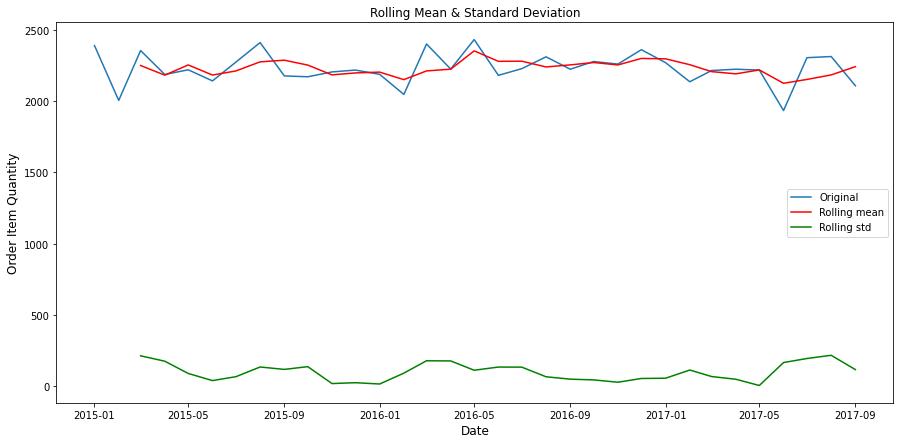

In [120]:

plt.figure(figsize=(15,7))
plt.plot(Monthly_Quantity["Order Item Quantity"], label='Original')
plt.plot(Monthly_Quantity["Order Item Quantity"].rolling(window=3).mean(), color='red', label='Rolling mean')
plt.plot(Monthly_Quantity["Order Item Quantity"].rolling(window=3).std(), color='green', label='Rolling std')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Order Item Quantity', fontsize=12)
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

In [121]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline

### TEST for checking the stationarity of Data

In [122]:
adf_test = adfuller(Monthly_Quantity)
print(f'p-value: {adf_test[1]}')

p-value: 2.2438251656337983e-11


Since the p-value is less than 0.05, it means data is stationary

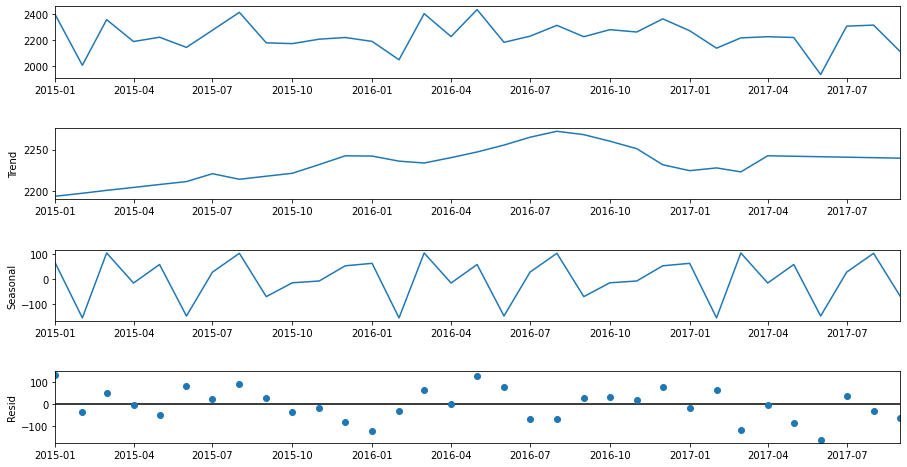

In [123]:

def seasonal_decompose (Monthly_Quantity):
    decomposition = sm.tsa.seasonal_decompose(Monthly_Quantity, model='additive', extrapolate_trend=12)
    
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    fig = decomposition.plot()
    fig.set_size_inches(14, 7)
    plt.show()
    
    return trend, seasonal, residual
 
trend, seasonal, residual = seasonal_decompose(Monthly_Quantity)

Text(0.5, 1.0, 'Daily_Sales')

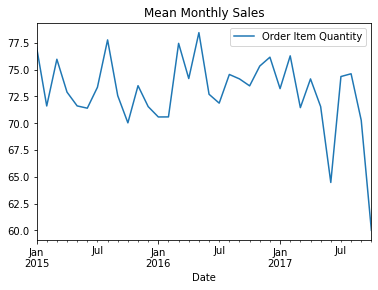

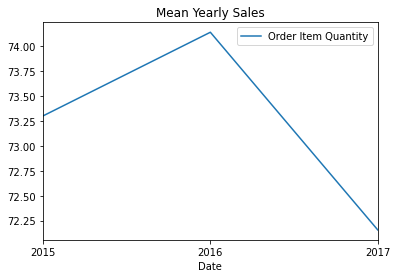

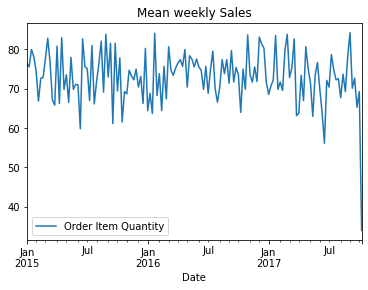

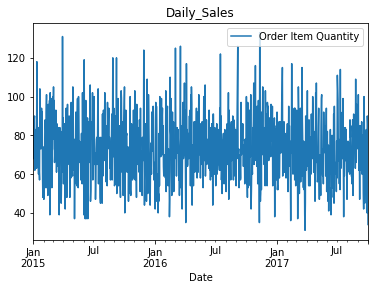

In [124]:
sales_agg_monthly = Cleats_Sold.resample("M")[["Order Item Quantity"]].mean()
sales_agg_monthly.plot()
plt.title('Mean Monthly Sales')

sales_agg_yearly = Cleats_Sold.resample("Y")[["Order Item Quantity"]].mean()
sales_agg_yearly.plot()
plt.title('Mean Yearly Sales')

sales_agg_weekly = Cleats_Sold.resample("W")[["Order Item Quantity"]].mean()
sales_agg_weekly.plot()
plt.title('Mean weekly Sales')

sales_agg_daily = Cleats_Sold.resample("D")[["Order Item Quantity"]].mean()
sales_agg_daily.plot()
plt.title('Daily_Sales')

In [125]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 69.0 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [126]:
Monthly_Discount.drop(Monthly_Discount.tail(1).index,inplace=True)

In [127]:
Monthly_Discount.shape

(33, 1)

In [128]:
Exog = Monthly_Discount[['Order Item Discount']].to_numpy()

In [129]:
from pmdarima import auto_arima

In [130]:


# Split the data into training and test sets
train_data = Monthly_Quantity[:int(0.8*len(Monthly_Quantity))]
test_data = Monthly_Quantity[int(0.8*len(Monthly_Quantity)):]

# Create an auto_arima model
model = auto_arima(train_data, exogenous=Exog, start_p=0, start_q=0,
                   max_p=5, max_q=5, m=1, d=None, 
                    trace=True,
                   error_action='ignore',  
                   suppress_warnings=True,  # don't want convergence warnings
                   stepwise=True)  # set to stepwise

# Fit the model to the training data
model.fit(train_data)

# Make predictions on the test data
predictions = model.predict(n_periods=len(test_data))


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=319.600, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=317.815, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=317.851, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=477.032, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=320.366, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=319.782, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=321.776, Time=0.39 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.835 seconds


In [131]:
print(train_data.shape)
print(test_data.shape)

(26, 1)
(7, 1)


In [132]:
test_data

,Order Item Quantity
Index,
2017-03-01,2215
2017-04-01,2224
2017-05-01,2218
2017-06-01,1934
2017-07-01,2305
2017-08-01,2313
2017-09-01,2108


### Evaluate the model's performance

In [133]:
MAE = (mean_absolute_error(predictions,test_data))
print(MAE)

95.93391086777443


In [134]:
rmse = sqrt(mean_squared_error(test_data, predictions))
print(f' Root Mean Squared Error: {rmse:.3f}')

 Root Mean Squared Error: 133.937


In [135]:
MAPE = (mean_absolute_percentage_error(test_data, predictions))*100
print("MAPE:", MAPE)

MAPE: 4.625799000689185


In [136]:
print(predictions)

2017-03-01    2280.349319
2017-04-01    2227.559522
2017-05-01    2246.865208
2017-06-01    2239.804952
2017-07-01    2242.386949
2017-08-01    2241.442690
2017-09-01    2241.788014
Freq: MS, dtype: float64


# ARIMA PREDICTION

In [137]:
Arima_prediction2 = predictions.iloc[1:2]
Arima_prediction2 = Arima_prediction2.tolist()


In [138]:
df_vertical = pd.concat([xgboost_prediction2, linear_prediction2, Forest_prediction2])

In [139]:
array = df_vertical.values
array

array([[2211.80224609],
       [2205.0196114 ],
       [2215.19      ]])

In [140]:
array = np.append(array, Arima_prediction2)
print(array)

[2211.80224609 2205.0196114  2215.19       2227.55952201]


In [141]:
count = np.size(array)
print(count)

4


### Exponential Smoothing

In [142]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [143]:
def simple_exponential_smoothing(MonthlyItemQuantity, alpha):
    """
    Perform simple exponential smoothing.
    Args:
        series: input series
        alpha: smoothing factor (between 0 and 1)
    Returns:
        smoothed series
    """
    # Initialize the smoothed series with the first value of the input series
    smoothed_series = [MonthlyItemQuantity[0]]
    # Loop through the rest of the series
    for t in range(1, len(MonthlyItemQuantity)):
        # Calculate the smoothed value for time t
        smoothed_series.append(alpha * MonthlyItemQuantity[t] + (1 - alpha) * smoothed_series[t-1])
    return smoothed_series

In [144]:
alpha1 = 0.5

smoothed_series = simple_exponential_smoothing(MonthlyItemQuantity, alpha1)
print(smoothed_series)

[2187, 2203.5, 2172.75, 2223.375, 2317.1875, 2247.09375, 2209.046875, 2207.0234375, 2212.51171875, 2200.255859375, 2123.6279296875, 2262.31396484375, 2243.656982421875, 2337.8284912109375, 2259.4142456054688, 2243.7071228027344, 2277.353561401367, 2250.6767807006836, 2264.338390350342, 2262.169195175171, 2311.5845975875854, 2290.7922987937927, 2213.3961493968964, 2214.198074698448, 2219.099037349224, 2218.549518674612, 2076.274759337306, 2190.637379668653, 2251.8186898343265, 2179.9093449171633]


In [145]:
errors = []
for a, f in zip(MonthlyItemQuantity, smoothed_series):
    errors.append(a - f)

# Calculate the MSE
mse = np.sum(np.square(errors)) / len(errors)

# Calculate the RMSE
rmse = np.sqrt(mse)

print("Errors:", errors)
print("RMSE:", rmse)

MAE = (mean_absolute_error(smoothed_series,MonthlyItemQuantity))
print("MAE:", MAE)

MAPE = (mean_absolute_percentage_error(smoothed_series, MonthlyItemQuantity))*100
print("MAPE:", MAPE)


Errors: [0, 16.5, -30.75, 50.625, 93.8125, -70.09375, -38.046875, -2.0234375, 5.48828125, -12.255859375, -76.6279296875, 138.68603515625, -18.656982421875, 94.1715087890625, -78.41424560546875, -15.707122802734375, 33.64643859863281, -26.676780700683594, 13.661609649658203, -2.1691951751708984, 49.41540241241455, -20.792298793792725, -77.39614939689636, 0.8019253015518188, 4.900962650775909, -0.5495186746120453, -142.27475933730602, 114.36262033134699, 61.181310165673494, -71.90934491716325]
RMSE: 61.374142019339295
MAE: 45.38659478978564
MAPE: 2.042379422272335


# Exponential Smoothing PREDICTION

In [146]:
Monthly_Quantity.shape

(33, 1)

In [147]:
train_data = Monthly_Quantity[:int(0.8*len(Monthly_Quantity))]
test_data = Monthly_Quantity[int(0.8*len(Monthly_Quantity)):]

In [148]:
alpha = 0.7

In [149]:

model = SimpleExpSmoothing(train_data['Order Item Quantity'])
fit = model.fit(smoothing_level=alpha)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  # If an index is available, see if it is a date-based index or if it


In [150]:
ES_predictions2 = fit.predict(start=test_data.index[0], end=test_data.index[-1])

In [151]:
ES_prediction2 = ES_predictions2.iloc[1:2]
ES_prediction2 = ES_prediction2.tolist()
ES_prediction2

[2181.7236326579377]

In [152]:
print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, ES_prediction2))

	Mean absolute error (MAE): 42.27636734206226


In [153]:
input_array = np.append(array, ES_prediction2)
print(input_array)

[2211.80224609 2205.0196114  2215.19       2227.55952201 2181.72363266]


In [154]:
Actual_value2

24    2224
Name: Order Item Quantity, dtype: int64

# FINAL OUTPUT

Implement multilayer perceptron to get the final forecast for Cleats Category

In [156]:
input = input_array

In [421]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        self.input_size = input_size
        self.hidden_size_1 = hidden_size_1
        self.hidden_size_2 = hidden_size_2
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden_1 = np.random.randn(self.input_size, self.hidden_size_1)
        self.biases_input_hidden_1 = np.zeros(self.hidden_size_1)
        self.weights_hidden_1_hidden_2 = np.random.randn(self.hidden_size_1, self.hidden_size_2)
        self.biases_hidden_1_hidden_2 = np.zeros(self.hidden_size_2)
        self.weights_hidden_2_output = np.random.randn(self.hidden_size_2, self.output_size)
        self.biases_hidden_2_output = np.zeros(self.output_size)

    def forward(self, input):
        # Propagate input through the network
        self.hidden_1 = np.dot(input, self.weights_input_hidden_1) + self.biases_input_hidden_1
        self.hidden_2 = np.dot(self.hidden_1, self.weights_hidden_1_hidden_2) + self.biases_hidden_1_hidden_2
        self.output = np.dot(self.hidden_2, self.weights_hidden_2_output) + self.biases_hidden_2_output
        return self.output

# Create an MLP with 5 inputs,


# Create an MLP with 5 inputs, 2 hidden layers, and 1 output
mlp = MLP(5, 4, 3, 1)

# Propagate some input through the network and print the output
input = input_array
output = mlp.forward(input)
print(output)





[2250.27397222]


# Calculate Error for final Output

In [422]:
print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, output))

	Mean absolute error (MAE): 26.27397222138643
